In [8]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### Load training mit training dataset

In [4]:
train_mit = pd.read_csv("data/mitbih_train.csv")
train_mit.describe()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
count,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,...,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000,87553.000000
mean,0.890359,0.758158,0.423969,0.219104,0.201127,0.210399,0.205809,0.201774,0.198693,0.196758,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473382
std,0.240910,0.221814,0.227305,0.206880,0.177058,0.171910,0.178482,0.177241,0.171778,0.168358,...,0.044155,0.042089,0.040525,0.038651,0.037193,0.036255,0.034790,0.032865,0.031924,1.143190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682482,0.250965,0.048458,0.082329,0.088415,0.073333,0.066116,0.065000,0.068643,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826007,0.429467,0.165992,0.147870,0.158798,0.145320,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287634,0.298246,0.295393,0.290837,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [7]:
train_mit_X = train.iloc[:, :-1]
train_mit_Y = train.iloc[:, -1]

### ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
Dataset seems to be quite unbalanced

In [17]:
train_Y.value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64

### Plot one of each label

In [23]:
label_index = {i: train_Y.index[train_Y == i].tolist() for i in range(0, 5)}

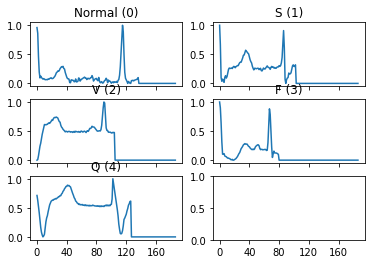

In [39]:
fig,a =  plt.subplots(3,2, sharex='col')
plt.setp(a, xticks=[i*20 for i in range(0, 11, 2)], xticklabels=[i*20 for i in range(0, 11, 2)])

a[0][0].plot(train_X.iloc[label_index[0][0], :])
a[0][0].set_title('Normal (0)')
a[0][1].plot(train_X.iloc[label_index[1][0], :])
a[0][1].set_title('S (1)')
a[1][0].plot(train_X.iloc[label_index[2][0], :])
a[1][0].set_title('V (2)')
a[1][1].plot(train_X.iloc[label_index[3][0], :])
a[1][1].set_title('F (3)')
a[2][0].plot(train_X.iloc[label_index[4][0], :])
a[2][0].set_title('Q (4)')
plt.show()

### Load training ptbdb training dataset

In [40]:
train_pt_n = pd.read_csv("data/ptbdb_normal.csv")
train_pt_a = pd.read_csv("data/ptbdb_abnormal.csv")
train_pt_n.describe()

,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
count,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,...,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.000000,4045.0,4045.0
mean,0.979665,0.711439,0.311665,0.119592,0.088618,0.130844,0.159659,0.165619,0.168020,0.170797,...,0.001540,0.001332,0.001304,0.001220,0.000991,0.000895,0.000454,0.000474,0.0,0.0
std,0.029063,0.186376,0.183478,0.110466,0.075767,0.081114,0.090141,0.096103,0.102515,0.106199,...,0.018666,0.016236,0.016670,0.016660,0.015206,0.015313,0.010835,0.011203,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964454,0.580160,0.164109,0.028717,0.027734,0.070772,0.094654,0.098848,0.095575,0.094969,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1.000000,0.726231,0.303182,0.092677,0.079580,0.121076,0.134367,0.142857,0.143004,0.145076,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,1.000000,0.863610,0.436192,0.187659,0.134871,0.183774,0.216205,0.217932,0.220616,0.223067,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.985955,0.910798,0.846591,0.770205,0.754524,0.749095,0.729192,0.700844,...,0.415879,0.361283,0.383522,0.407025,0.446281,0.483471,0.371502,0.376668,0.0,0.0


### Normal vs Abnormal count

In [41]:
train_pt_n.shape[0], train_pt_a.shape[0]

(4045, 10505)

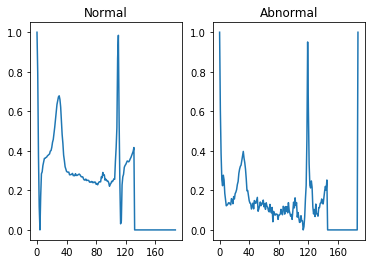

In [45]:
fig,a = plt.subplots(1,2, sharex='col')
plt.setp(a, xticks=[i*20 for i in range(0, 11, 2)], xticklabels=[i*20 for i in range(0, 11, 2)])

a[0].plot(train_pt_n.iloc[0, :])
a[0].set_title('Normal')
a[1].plot(train_pt_a.iloc[0, :])
a[1].set_title('Abnormal')
plt.show()